In [1]:
import numpy as np

import pandas as pd
import os

import matplotlib.pyplot as plt
from sge.parameters import params
import seaborn as sns

from sge.engine import setup

In [21]:
path = 'results/cdrag/'
with open(f"{path}run_1/iteration_2.json") as file:
    df_grid = pd.read_json(file)


In [22]:
df_grid.head()

,genotype,fitness,mapping_values,tree_depth,original_phenotype,phenotype,fitness_validation,other_info
0,"[[0], [1], [2, 1], [2, 0, 1], [1, 2, 2, 0, 1],...",0.299379,"[1, 1, 2, 3, 5, 7, 8, 6]",7,((((Constant/x[1])**Constant)**Constant)/(Cons...,((((0.3935471856472177/x[1])**0.22960345140396...,0.317950,"{'fitness 25': 0.29937914381769903, 'fitness 5..."
1,"[[0], [2], [1], [3, 2], [1], [3, 1], [0, 0, 1]...",0.346823,"[1, 1, 1, 2, 1, 2, 3, 2]",7,((x[1]/((x[1]-Constant)**Constant))**Constant),((x[1]/((x[1]-0.8282040025392404)**0.226631350...,0.385076,"{'fitness 25': 0.346823029177587, 'fitness 53'..."
2,"[[0], [1], [0, 3], [0, 2], [0, 1, 1], [3, 0, 3...",0.454720,"[1, 1, 2, 2, 3, 6, 7, 5]",7,(Constant/x[1]+(Constant/x[0])*((x[1]/x[1])**C...,(0.517277205507015/x[1]+(0.4734806562724796/x[...,0.554721,"{'fitness 25': 0.45472039633516403, 'fitness 5..."
3,"[[0], [2], [2], [2], [1], [3], [0, 1], [0]]",0.689029,"[1, 1, 1, 1, 1, 1, 2, 1]",7,((((x[0]/Constant)**Constant)**Constant)**Cons...,((((x[0]/0.29382526168496037)**0.8141960136770...,0.791339,"{'fitness 25': 0.689028908337971, 'fitness 53'..."
4,"[[0], [2], [2, 1], [2], [2], [3, 2, 3, 3], [0,...",0.748646,"[1, 1, 1, 1, 1, 0, 1, 1]",7,(((x[1]**Constant)**Constant)**Constant),(((x[1]**0.10718605352418975)**0.8867393729894...,0.851532,"{'fitness 25': 0.748646043600105, 'fitness 53'..."


In [15]:
def get_info_best_fitness(folder):
    try:
        df = pd.read_csv(os.path.join(folder, 'progress_report.csv'), names=['fitness', 'mean', 'std', 'valids'])
        best_fitness = df['fitness'].iloc[-1]
    except FileNotFoundError:
        print(f"Archivo no encontrado en {folder}")
        best_fitness = np.nan

    mean_best_fitness = best_fitness  # Valor de la última fila
    std_best_fitness = 0  # Modificar si es necesario

    return mean_best_fitness, std_best_fitness



def get_columnas_variable(df):
    columnas_no_listas_dicts = [col for col in df.columns if not isinstance(df[col].iloc[0], (list, dict))]
    resultado = df[columnas_no_listas_dicts].nunique() > 1
    columnas_valiables = list(resultado.index[resultado.values])
    return columnas_valiables




def get_best_fitness(df, path):
    mean_best_fitness_list = []
    std_best_fitness_list = []
    path_folder = os.path.join(path, 'run_1/')
    mean_best_fitness, std_best_fitness = get_info_best_fitness(path_folder)
    df['mean best fitness'] = [mean_best_fitness] * len(df)
    df['std best fitness'] = [std_best_fitness] * len(df)
    return df






Hay duplicados en las columnas especificadas.


C:\Users\nicol\AppData\Local\Temp\ipykernel_19628\506720588.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean best fitness'] = [mean_best_fitness] * len(df)
C:\Users\nicol\AppData\Local\Temp\ipykernel_19628\506720588.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std best fitness'] = [std_best_fitness] * len(df)


ValueError: could not convert string to float: '   2\t2.993791e-01\t2.647641e+06\t1.777979e+07'

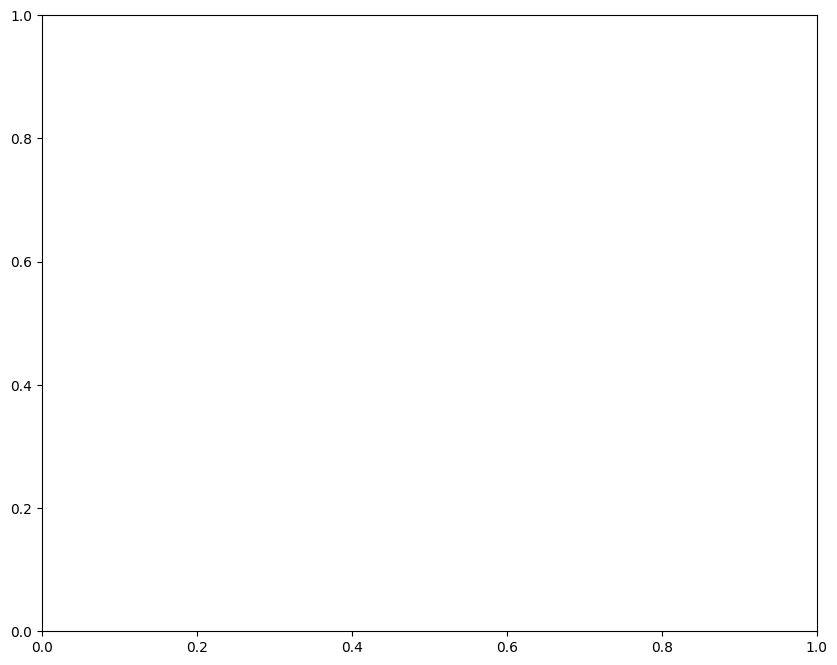

In [20]:
columnas_valiables = get_columnas_variable(df_grid)
if df_grid.duplicated(subset=[columnas_valiables[0], columnas_valiables[1]]).any():
    print("Hay duplicados en las columnas especificadas.")
    df_grid = df_grid.drop_duplicates(subset=[columnas_valiables[0], columnas_valiables[1]])



df_grid = get_best_fitness(df_grid,path)

df_grid_pivot = df_grid.pivot(index=columnas_valiables[0], columns=columnas_valiables[1], values='mean best fitness')


fig, axis = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(df_grid_pivot,ax=axis)
plt.title('Error en obtener un expresión para coeficiente de arrastre en función \n del tamaño de población y la cantidad de generaciones',fontsize=16)
plt.xlabel('Tamaño de población',fontsize=14)
plt.ylabel('Cantidad de generaciones',fontsize=14)


In [17]:
columnas_valiables[0]

'fitness'

In [18]:
columnas_valiables[1]

'tree_depth'

In [23]:
import random
from numpy import cos, sin
from sge.utilities.protected_math import _log_, _div_, _exp_, _inv_, _sqrt_, protdiv
from sge.engine import setup
import sge
import argparse
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


class SymbolicRegression:
    """
    Clase diseñada para realizar regresión simbólica enfocada en modelar el coeficiente de arrastre (cdrag) 
    como una función de las características de diferentes configuraciones de paquetes de baterías.
    Los datos se agrupan por la cantidad de celdas en el paquete de baterías.
    """
    
    def __init__(self, has_test_set=False, invalid_fitness=9999999):
        """
        Inicializa la clase SymbolicRegression con valores por defecto.

        :param has_test_set: No se usa actualmente. Indicaría si hay un conjunto de pruebas disponible.
        :param invalid_fitness: Valor que se usa para la aptitud cuando la evaluación de un individuo falla.
        """
        self.__invalid_fitness = invalid_fitness
        self.read_fit_cases()

    def read_fit_cases(self):
        """
        Lee y procesa los casos de ajuste de los archivos txt, correspondientes a los datos de coeficiente de arrastre 
        para paquetes de baterías con diferente número de celdas. Prepara los datos para el entrenamiento y la validación.
        """
        # Carga y muestreo aleatorio de los datos para un paquete de baterías de 25 celdas
        self.df_25 = pd.read_csv('resources/LIB/CI/df_cdrag_25.txt', sep=',').sample(n=1000, random_state=1)
        self.X_25 = self.df_25.values[:, :-1]
        self.Y_25 = self.df_25.values[:, -1]
        
        # Carga y muestreo aleatorio de los datos para un paquete de baterías de 53 celdas
        self.df_53 = pd.read_csv('resources/LIB/CI/df_cdrag_53.txt', sep=',').sample(n=1000, random_state=1)
        self.X_53 = self.df_53.values[:, :-1]
        self.Y_53 = self.df_53.values[:, -1]
        
        # Carga y muestreo aleatorio de los datos para un paquete de baterías de 74 celdas
        self.df_74 = pd.read_csv('resources/LIB/CI/df_cdrag_74.txt', sep=',').sample(n=1000, random_state=1)
        self.X_74 = self.df_74.values[:, :-1]
        self.Y_74 = self.df_74.values[:, -1]
        
        # Carga y muestreo aleatorio de los datos para un paquete de baterías de 102 celdas
        self.df_102 = pd.read_csv('resources/LIB/CI/df_cdrag_102.txt', sep=',').sample(n=1000, random_state=1)
        self.X_102 = self.df_102.values[:, :-1]
        self.Y_102 = self.df_102.values[:, -1]

    def get_error(self, individual, Y_train, dataset):
        """
        Evalúa un individuo (expresión matemática) calculando el error cuadrático medio entre las predicciones y 
        los valores reales del coeficiente de arrastre para un conjunto de datos específico de paquetes de baterías.

        :param individual: Expresión del individuo a evaluar como una cadena de texto.
        :param Y_train: Valores reales del coeficiente de arrastre (cdrag) para el conjunto de datos.
        :param dataset: Características del conjunto de datos (sin incluir el cdrag).
        :return: Error cuadrático medio o un valor de aptitud inválido si la evaluación falla.
        """
        try:
            # print(f'get_error - individuo: {individual}')
            # Evaluar la expresión del individuo en el contexto de los datos de entrada
            Y_pred = list(map(lambda x: eval(individual), dataset))
            # Calcular el error cuadrático medio (MSE) para las predicciones
            error = mean_squared_error(Y_train, Y_pred, squared=False)
        except Exception as e:
            # Manejo de errores en la evaluación del individuo
            print(f"Error evaluating individual: {e}")
            print(f'individuo que genera error: {individual}')
            error = self.__invalid_fitness
        
        # Asignar un valor de error inválido si el error es None
        if error is None:
            error = self.__invalid_fitness
        
        return error

    def evaluate(self, individual):
        """
        Evalúa la aptitud de un individuo en varios conjuntos de datos representando diferentes configuraciones de paquetes 
        de baterías y calcula la aptitud general basada en el error de predicción del coeficiente de arrastre.

        :param individual: La expresión matemática del individuo a evaluar.
        :return: Una tupla que contiene la aptitud para el conjunto de 25 celdas y la aptitud promedio para los conjuntos 
                 de 53, 74 y 102 celdas, junto con un diccionario que detalla la aptitud para cada configuración.
        """
        if individual is None:
            return self.__invalid_fitness
        print(f"cdrag.evaluate - se evaluara individuo: {individual}")
        # Calcular el error para cada configuración de paquete de baterías
        error_25 = self.get_error(individual, self.Y_25, np.concatenate((eval_func.X_25, eval_func.X_74)))
        error_53 = self.get_error(individual, self.Y_53, self.X_53)
        error_74 = self.get_error(individual, self.Y_74, self.X_74)
        error_102 = self.get_error(individual, self.Y_102, self.X_102)
        
        # Uso del error del conjunto de 25 celdas como aptitud de entrenamiento
        fitness_train = error_25
        # Calcular la aptitud promedio para los conjuntos de validación
        fitness_val = np.mean([error_53, error_74, error_102])
        
        # Devolver la aptitud de entrenamiento, de validación y un diccionario detallado
        return fitness_train, fitness_val, {
            'fitness 25': error_25,
            'fitness 53': error_53,
            'fitness 74': error_74,
            'fitness 102': error_102
        }

eval_func = SymbolicRegression()

In [24]:
eval_func.X_102

array([[1.20000000e+00, 6.39557978e+03],
       [6.00000000e-01, 1.70770738e+03],
       [6.00000000e-01, 3.22630909e+02],
       ...,
       [6.00000000e-01, 1.93489789e+03],
       [1.20000000e+00, 2.32759797e+03],
       [6.00000000e-01, 1.24756328e+03]])

In [27]:
eval_func.X_25

array([[1.10800000e+00, 2.47970245e+03],
       [1.20000000e+00, 2.31529765e+03],
       [7.16000000e-01, 2.74408209e+03],
       ...,
       [6.00000000e-01, 3.63641189e+03],
       [6.00000000e-01, 4.72070765e+03],
       [1.15700000e+00, 2.45129933e+03]])

In [29]:
len(eval_func.X_74)

1000

In [30]:
len(np.concatenate((eval_func.X_25, eval_func.X_74)))

2000